## ***MOVIES***

In [20]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [21]:
movies = pd.read_csv("/content/my_movies.csv")
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [22]:
df=pd.get_dummies(movies)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [24]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(V2_Patriot, Sixth Sense, Patriot, Gladiator, ..."
77,0.4,"(V1_Gladiator, Sixth Sense, V2_Patriot, Gladia..."
78,0.4,"(V1_Gladiator, Sixth Sense, V2_Patriot, Patrio..."
79,0.4,"(V1_Gladiator, V2_Patriot, Gladiator, Patriot,..."


In [25]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
649,(V1_Gladiator),"(V2_Patriot, Sixth Sense, Patriot, Gladiator, ...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
650,(Sixth Sense),"(V2_Patriot, V1_Gladiator, Patriot, Gladiator,...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
651,(Patriot),"(V2_Patriot, Sixth Sense, V1_Gladiator, Gladia...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
652,(Gladiator),"(V2_Patriot, Sixth Sense, V1_Gladiator, Patrio...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


In [26]:
rules.sort_values('lift',ascending = False)[0:12]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
327,(V1_Sixth Sense),"(Sixth Sense, V4_Green Mile, Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
322,"(Sixth Sense, V1_Sixth Sense)","(Green Mile, V4_Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
40,(V4_Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
41,(V1_Sixth Sense),(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
176,"(Green Mile, V4_Green Mile)",(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
86,"(Sixth Sense, Green Mile)",(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
87,"(Sixth Sense, V1_Sixth Sense)",(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
90,(Green Mile),"(Sixth Sense, V1_Sixth Sense)",0.2,0.2,0.2,1.0,5.0,0.16,inf
91,(V1_Sixth Sense),"(Sixth Sense, Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
92,"(Sixth Sense, V4_Green Mile)",(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf


In [29]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
649,(V1_Gladiator),"(V2_Patriot, Sixth Sense, Patriot, Gladiator, ...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
650,(Sixth Sense),"(V2_Patriot, V1_Gladiator, Patriot, Gladiator,...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
651,(Patriot),"(V2_Patriot, Sixth Sense, V1_Gladiator, Gladia...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
652,(Gladiator),"(V2_Patriot, Sixth Sense, V1_Gladiator, Patrio...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'rating')

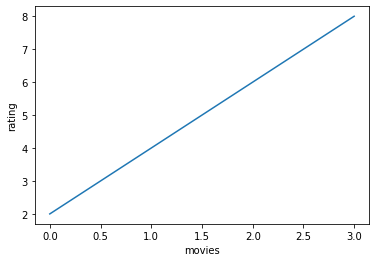

In [31]:
movies=[0,1,2,3]
rating=[2,4,6,8]
plt.plot(movies,rating)
plt.xlabel('movies')
plt.ylabel('rating')

In [32]:
plt.show()

# **BOOK**

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
book = pd.read_csv("/content/book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
book=pd.get_dummies(book)
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [13]:
frequent_itemsets = apriori(book, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [14]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


In [15]:
rules.sort_values('lift',ascending = True)[0:22]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


In [17]:
rules[rules.lift<2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
